# Chapter 4 練習と総合問題解答

## 4.1 Pandas

In [1]:
# 以下のモジュールを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

### 4.1.1 階層型インデックス

#### <練習問題 1>

次のデータに対して、Kyotoの列だけ抜き出してみましょう。

In [99]:
hier_data_frame1 = DataFrame(np.arange(12).reshape((3,4))
                           ,index = [['c','d','d'],[1,2,1]]
                           ,columns = [['Kyoto','Nagoya','Hokkaido','Kyoto']
                                      ,['Yellow','Yellow','Red','Blue']]
                           )

hier_data_frame1.index.names =['key1','key2']
hier_data_frame1.columns.names =['city','color']
hier_data_frame1

city       Kyoto Nagoya Hokkaido Kyoto
color     Yellow Yellow      Red  Blue
key1 key2                             
c    1         0      1        2     3
d    2         4      5        6     7
     1         8      9       10    11

In [100]:
# 解答
hier_data_frame1['Kyoto']

color      Yellow  Blue
key1 key2              
c    1          0     3
d    2          4     7
     1          8    11

#### <練習問題 2>

練習問題1のデータに対して、cityをまとめて列同士の平均値を出してください。

In [101]:
# 解答
# city列合計
hier_data_frame1.mean(level='city',axis=1)

city       Hokkaido  Kyoto  Nagoya
key1 key2                         
c    1          2.0    1.5     1.0
d    2          6.0    5.5     5.0
     1         10.0    9.5     9.0

#### <練習問題 3>

練習問題1のデータに対して、key2ごとに行の合計値を算出してみましょう。


In [102]:
# 解答
# city列合計
hier_data_frame1.sum(level='key2')

city,Kyoto,Nagoya,Hokkaido,Kyoto
color,Yellow,Yellow,Red,Blue
key2,,,,
1,8,10,12,14
2,4,5,6,7


### 4.1.2 データのマージ

#### <練習問題 1>

下記の2つのデータテーブルに対して、内部結合してみましょう。

In [112]:
# データ4の準備
attri_data4 = {'ID':['0','1','2','3','4','6','8','11','12','13']
        ,'city':['Tokyo','Osaka','Kyoto','Hokkaido','Tokyo','Tokyo','Osaka','Kyoto','Hokkaido','Tokyo']
        ,'birth_year':[1990,1989,1992,1997,1982,1991,1988,1990,1995,1981]
        ,'name':['Hiroshi','Akiko','Yuki','Satoru','Steeve','Mituru','Aoi','Tarou','Suguru','Mitsuo']}
attri_data_frame4 = DataFrame(attri_data4)
print(attri_data_frame4)

# データ5の準備
attri_data5 = {'ID':['0','1','3','6','8']
        ,'math':[20,30,50,70,90]
        ,'English':[30,50,50,70,20]
        ,'sex':['M','F','F','M','M']
        ,'index_num':[0,1,2,3,4]}
attri_data_frame5 = DataFrame(attri_data5)
print(attri_data_frame5)

   ID  birth_year      city     name
0   0        1990     Tokyo  Hiroshi
1   1        1989     Osaka    Akiko
2   2        1992     Kyoto     Yuki
3   3        1997  Hokkaido   Satoru
4   4        1982     Tokyo   Steeve
5   6        1991     Tokyo   Mituru
6   8        1988     Osaka      Aoi
7  11        1990     Kyoto    Tarou
8  12        1995  Hokkaido   Suguru
9  13        1981     Tokyo   Mitsuo
   English ID  index_num  math sex
0       30  0          0    20   M
1       50  1          1    30   F
2       50  3          2    50   F
3       70  6          3    70   M
4       20  8          4    90   M


In [113]:
# 解答
pd.merge(attri_data_frame4,attri_data_frame5,on='ID')

,ID,birth_year,city,name,English,index_num,math,sex
0,0,1990,Tokyo,Hiroshi,30,0,20,M
1,1,1989,Osaka,Akiko,50,1,30,F
2,3,1997,Hokkaido,Satoru,50,2,50,F
3,6,1991,Tokyo,Mituru,70,3,70,M
4,8,1988,Osaka,Aoi,20,4,90,M


#### <練習問題 2>

attri_data_frame4をベースにattri_data_frame5のテーブルを外部結合してみましょう。

In [114]:
# 解答
pd.merge(attri_data_frame4,attri_data_frame5,how='outer')

,ID,birth_year,city,name,English,index_num,math,sex
0,0,1990,Tokyo,Hiroshi,30.0,0.0,20.0,M
1,1,1989,Osaka,Akiko,50.0,1.0,30.0,F
2,2,1992,Kyoto,Yuki,NaN,NaN,NaN,NaN
3,3,1997,Hokkaido,Satoru,50.0,2.0,50.0,F
4,4,1982,Tokyo,Steeve,NaN,NaN,NaN,NaN
5,6,1991,Tokyo,Mituru,70.0,3.0,70.0,M
6,8,1988,Osaka,Aoi,20.0,4.0,90.0,M
7,11,1990,Kyoto,Tarou,NaN,NaN,NaN,NaN
8,12,1995,Hokkaido,Suguru,NaN,NaN,NaN,NaN
9,13,1981,Tokyo,Mitsuo,NaN,NaN,NaN,NaN


#### <練習問題 3>
attri_data_frame4に対して、以下のデータを縦結合してみましょう。

In [115]:
# データの準備
attri_data6 = {'ID':['70','80','90','120','150']
        ,'city':['Chiba','Kanagawa','Tokyo','Fukuoka','Okinawa']
        ,'birth_year':[1980,1999,1995,1994,1994]
        ,'name':['Suguru','Kouichi','Satochi','Yukie','Akari']}
attri_data_frame6 = DataFrame(attri_data6)

In [116]:
pd.concat([attri_data_frame4,attri_data_frame6])

,ID,birth_year,city,name
0,0,1990,Tokyo,Hiroshi
1,1,1989,Osaka,Akiko
2,2,1992,Kyoto,Yuki
3,3,1997,Hokkaido,Satoru
4,4,1982,Tokyo,Steeve
5,6,1991,Tokyo,Mituru
6,8,1988,Osaka,Aoi
7,11,1990,Kyoto,Tarou
8,12,1995,Hokkaido,Suguru
9,13,1981,Tokyo,Mitsuo


### 4.1.3 データの変換

#### <練習問題 1>

一章で使用した「student-mat.csv」を使います。ageの2倍をしたカラムを追加してみましょう。

In [130]:
# 解答
# データがあるパスに移動してください
import pandas as pd
student_data_math = pd.read_csv("student-mat.csv",sep=";")
student_data_math['age_d'] = student_data_math['age'].map(lambda x: x*2)
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,age_d
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,36
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,34
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,30
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,30
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,32


#### <練習問題 2>

上記と同じデータで、「absences」のカラムについて、以下の3つのビンに分けてそれぞれの人数を数えてみましょう。なお、cutのオプション設定で、デフォルトは右側が閉区間になっていますが、今回は0が入るためのright=Falseを追加してください。

In [131]:
#　分割の粒度
absences_bins = [0,1,5,100]

In [133]:
# 解答
student_data_math_ab_cut_data = pd.cut(student_data_math.absences,absences_bins,right=False)
pd.value_counts(student_data_math_ab_cut_data)

[5, 100)    151
[1, 5)      129
[0, 1)      115
Name: absences, dtype: int64

#### <練習問題 3>

上記と同じデータで、「absences」のカラムについて、qcutを用いて3つのビンに分けてみましょう。

In [134]:
# 解答
student_data_math_ab_qcut_data = pd.qcut(student_data_math.absences,3)
pd.value_counts(student_data_math_ab_qcut_data)

[0, 2]     183
(6, 75]    115
(2, 6]      97
Name: absences, dtype: int64

### 4.1.4 データの集約とグループ演算

#### <練習問題 1>

一章で使用した「student-mat.csv」を使って、pandasの集計処理してみましょう。まずは、schoolを軸にして、G1の平均点をそれぞれ求めてみましょう。

In [140]:
# 解答
import pandas as pd
student_data_math = pd.read_csv("student-mat.csv",sep=";")
student_data_math.groupby(["school"])["G1"].mean()

school
GP    10.939828
MS    10.673913
Name: G1, dtype: float64

#### <練習問題 2>

次は、schoolと性別を軸にして、G1,G2,G3の平均点をそれぞれ求めてみましょう。

In [141]:
# 解答
student_data_math.groupby(["school","sex"])["G1","G2","G3"].mean()

G1         G2         G3
school sex                                 
GP     F    10.579235  10.398907   9.972678
       M    11.337349  11.204819  11.060241
MS     F    10.920000  10.320000   9.920000
       M    10.380952  10.047619   9.761905

#### <練習問題 3>

次は、schoolと性別を軸にして、G1,G2,G3の最大値、最小値をまとめて算出してみましょう。

In [142]:
# 解答
functions = ['max','min']
student_data_math2 = student_data_math.groupby(['school','sex'])
student_data_math2['G1','G2','G3'].agg(functions)

G1      G2      G3    
           max min max min max min
school sex                        
GP     F    18   4  18   0  19   0
       M    19   3  19   0  20   0
MS     F    19   6  18   5  19   0
       M    15   6  16   5  16   0

## 4.2 データの可視化

### 4.2.1 データ可視化の基礎

#### <練習問題 1>

1章で使った学生のデータ（数学）を使って、学校を選んだ理由（reason）を円グラフ化して、それぞれの割合を出してください。

(-1.018, 1.009, -1.004, 1.000)

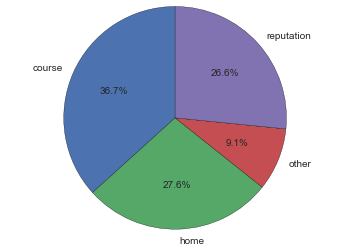

In [149]:
# 解答
import pandas as pd

student_data_math = pd.read_csv("student-mat.csv",sep=";")
student_data_math.groupby("reason").size().plot(kind="pie", autopct='%1.1f%%',startangle=90)
plt.ylabel("")
plt.axis('equal')

#### <練習問題 2>

上記と同じデータで、higher - 高い教育を受けたいかどうか(binary: yes or no)を軸にして、それぞれの数学の最終成績G3の平均値を棒グラフで表示してください。ここから何か推測できることはありますか？

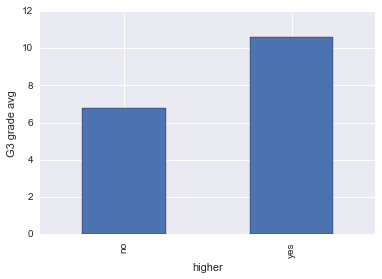

In [150]:
# 解答
student_data_math.groupby("higher")["G3"].mean().plot(kind="bar")
plt.xlabel("higher")
plt.ylabel("G3 grade avg")

# やはり意識が高い人たちの方が成績は高めであることがわかる

#### <練習問題 3>

上記と同じデータで、通学時間（trabeltime）を軸にして、それぞれの数学の最終成績G3の平均値を横棒グラフで表示してください。何か推測できることはありますか？

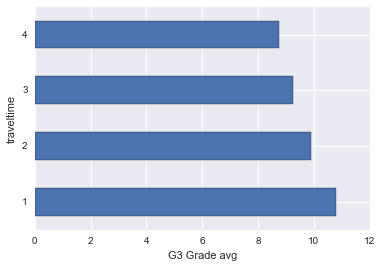

In [151]:
# 解答
student_data_math.groupby(["traveltime"])["G3"].mean().plot(kind="barh")
plt.xlabel("G3 Grade avg")

# 通学時間が長いと成績が低くなる傾向にあるが、影響していると言えるのだろうか

## 4.3 欠損データと異常値の取り扱いの基礎

### 4.3.1 欠損データの扱い方

#### <練習問題 1>

以下のデータに対して、1列でもNaNがある場合は削除し、その結果を表示してください。

In [163]:
# データの準備
import numpy as np
from numpy import nan as NA
import pandas as pd


sample_data_frame2 = pd.DataFrame(np.random.rand(15,6))

# NAにする
sample_data_frame2.ix[2,0] = NA
sample_data_frame2.ix[5:8,2] = NA
sample_data_frame2.ix[7:9,3] = NA
sample_data_frame2.ix[10,5] = NA


sample_data_frame2

,0,1,2,3,4,5
0,0.415247,0.550350,0.557778,0.383570,0.482254,0.142117
1,0.066697,0.908009,0.197264,0.227380,0.291084,0.305750
2,NaN,0.481305,0.963701,0.289538,0.662069,0.883058
3,0.469084,0.717253,0.467172,0.661786,0.539626,0.862264
4,0.314643,0.129364,0.291149,0.210694,0.891432,0.583443
5,0.672456,0.111327,NaN,0.197844,0.361385,0.703919
6,0.943599,0.047140,NaN,0.222312,0.270678,0.985113
7,0.172857,0.359706,NaN,NaN,0.559918,0.181495
8,0.650042,0.845300,NaN,NaN,0.706246,0.634860
9,0.696152,0.353721,0.999253,NaN,0.616951,0.278251


In [164]:
sample_data_frame2.dropna()

,0,1,2,3,4,5
0,0.415247,0.550350,0.557778,0.383570,0.482254,0.142117
1,0.066697,0.908009,0.197264,0.227380,0.291084,0.305750
3,0.469084,0.717253,0.467172,0.661786,0.539626,0.862264
4,0.314643,0.129364,0.291149,0.210694,0.891432,0.583443
11,0.700689,0.894851,0.918055,0.108752,0.502343,0.749123
12,0.393294,0.468172,0.711183,0.725584,0.355825,0.562409
13,0.403318,0.076329,0.642033,0.344418,0.453335,0.916017
14,0.898894,0.926813,0.620625,0.089307,0.362026,0.497475


#### <練習問題 2>

上記で準備したデータに対して、NaNを0で埋めてください。

In [165]:
sample_data_frame2.fillna(0)

,0,1,2,3,4,5
0,0.415247,0.550350,0.557778,0.383570,0.482254,0.142117
1,0.066697,0.908009,0.197264,0.227380,0.291084,0.305750
2,0.000000,0.481305,0.963701,0.289538,0.662069,0.883058
3,0.469084,0.717253,0.467172,0.661786,0.539626,0.862264
4,0.314643,0.129364,0.291149,0.210694,0.891432,0.583443
5,0.672456,0.111327,0.000000,0.197844,0.361385,0.703919
6,0.943599,0.047140,0.000000,0.222312,0.270678,0.985113
7,0.172857,0.359706,0.000000,0.000000,0.559918,0.181495
8,0.650042,0.845300,0.000000,0.000000,0.706246,0.634860
9,0.696152,0.353721,0.999253,0.000000,0.616951,0.278251


#### <練習問題 3>

上記で準備したデータに対して、NaNをそれぞれの列の平均値で埋めてください。

In [166]:
sample_data_frame2.fillna(sample_data_frame2.mean())

,0,1,2,3,4,5
0,0.415247,0.550350,0.557778,0.383570,0.482254,0.142117
1,0.066697,0.908009,0.197264,0.227380,0.291084,0.305750
2,0.494512,0.481305,0.963701,0.289538,0.662069,0.883058
3,0.469084,0.717253,0.467172,0.661786,0.539626,0.862264
4,0.314643,0.129364,0.291149,0.210694,0.891432,0.583443
5,0.672456,0.111327,0.656784,0.197844,0.361385,0.703919
6,0.943599,0.047140,0.656784,0.222312,0.270678,0.985113
7,0.172857,0.359706,0.656784,0.368386,0.559918,0.181495
8,0.650042,0.845300,0.656784,0.368386,0.706246,0.634860
9,0.696152,0.353721,0.999253,0.368386,0.616951,0.278251


In [167]:
# 確認用
sample_data_frame2.mean()

0    0.494512
1    0.510722
2    0.656784
3    0.368386
4    0.525476
5    0.591807
dtype: float64

## 4.4 総合問題

### 4.4.1 時系列データ分析

ここでは、本章で身に付けたpandasやscipyなどを使って、時系列データや購買データについて扱っていきましょう。まずは、時系列のデータです。

（1）（データの取得と確認）下記のサイトより、dow_jones_index.zipをダウンロードし、中にあるdow_jones_index.dataを使って、データを読み込み、はじめの5行を表示してください。またデータのそれぞれのカラム情報等を見て、nullなどがあるか確認してください。　　

https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip　　

（2）（データの加工）カラムのopen、high、low、close等のデータは数字の前に$マークが付いているため、これを取り除いてください。また、日時をdate型で読み込んでいない場合は、date型に変換しましょう。

（3）カラムのcloseについて、各stockごとの要約統計量を算出してください。

（4）カラムのcloseについて、各stockの相関を算出する相関行列を出してください。また、seabornのheatmapを使って、相関行列のヒートマップを描いてみましょう。（ヒント：pandasのcorr()を使います。）

（5）(4)で算出した相関行列の中で一番相関係数が高いstockの組み合わせを抽出してください。さらに、その中でもっとも相関係数が高いペアを抜き出し、それぞれの時系列グラフを書いてください。

（6） pandasのrollingとwindow関数（窓関数）を使って、上記で使った各stockごとに、closeの過去5期（5週間）移動平均時系列データを計算してください。

（7） pandasのshift()を使って、上記で使った各stockごとに、closeの前期（1週前）との比の対数時系列データを計算してください。さらに、この中で、一番ボラティリティ（標準偏差）が一番大きいstockと小さいstockを抜き出し、その対数変化率グラフを書いてください。

※(6),(7)の補足

時系列データ$(\cdots ,y_{t-1},y_t,y_{t+1}, \cdots )$の過去n期の移動平均データとは、過去5期のデータの平均、

\begin{eqnarray}
ma_t = \sum_{s=t-n+1}^t \frac{y_s}{n}
\end{eqnarray}

時系列データ$(\cdots ,y_{t-1},y_t,y_{t+1}, \cdots )$の前期（1週前）との比の対数時系列データとは、$\log \frac{y_t} {y_{t-1}}$から成るデータの事です。増減率$r_t = \frac{y_t - y_{t-1}}{y_t}$が小さいとき、$r_t \approx \log \frac{y_t} {y_{t-1}}$の関係が成り立ちます。これは、$x$が十分小さいときに成り立つ、$\log (1+x) \approx x$から導かれます。増減率データ$(r_1,\cdots ,r_N )$のボラティリティとは、標準偏差

\begin{eqnarray}
\sqrt{\frac{1}{N}\sum_{t=1}^N (r_t - \frac{1}{N}\sum_{t=1}^N r_t)^2}
\end{eqnarray}

の事で、価格変動の大きさを示す指標として利用されます。

In [2]:
cd /Users/kunitaka/chapter2/

/Users/kunitaka/chapter2


In [9]:
# 解答 (1)
# データの取得
import requests, zipfile
from io import StringIO
import io

# url 
zip_file_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip"
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
# 展開
z.extractall()

In [3]:
# データの読み込み
dow_jones_index = pd.read_csv("dow_jones_index.data",sep=",")

In [4]:
# データのチェック
dow_jones_index.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [5]:
# データのカラム情報
dow_jones_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
quarter                               750 non-null int64
stock                                 750 non-null object
date                                  750 non-null object
open                                  750 non-null object
high                                  750 non-null object
low                                   750 non-null object
close                                 750 non-null object
volume                                750 non-null int64
percent_change_price                  750 non-null float64
percent_change_volume_over_last_wk    720 non-null float64
previous_weeks_volume                 720 non-null float64
next_weeks_open                       750 non-null object
next_weeks_close                      750 non-null object
percent_change_next_weeks_price       750 non-null float64
days_to_next_dividend                 750 non-null int64
percent_return_next_divi

In [6]:
# 解答 (2)
# 型変更　日時型
dow_jones_index.date = pd.to_datetime(dow_jones_index.date)

# ＄マークを消す
delete_dolchar = lambda x: str(x).replace("$", "")

#対象は、open,high,low.close,next_weeks_open,next_weeks_close
# 文字型を数値型を変換する処理
dow_jones_index.open = pd.to_numeric(dow_jones_index.open.map(delete_dolchar))
dow_jones_index.high = pd.to_numeric(dow_jones_index.high.map(delete_dolchar))
dow_jones_index.low = pd.to_numeric(dow_jones_index.low.map(delete_dolchar))
dow_jones_index.close = pd.to_numeric(dow_jones_index.close.map(delete_dolchar))
dow_jones_index.next_weeks_open = pd.to_numeric(dow_jones_index.next_weeks_open.map(delete_dolchar))
dow_jones_index.next_weeks_close = pd.to_numeric(dow_jones_index.next_weeks_close.map(delete_dolchar))

In [7]:
# check
dow_jones_index.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [8]:
# 解答(3)
# indexをセットする
dow_jones_index_stock_index = dow_jones_index.set_index(['date','stock'])

# データフレームワークの再構成
dow_jones_index_stock_index_unstack = dow_jones_index_stock_index.unstack()

# closeのみ対象
dow_close_data = dow_jones_index_stock_index_unstack['close']
#　要約統計量
dow_close_data.describe()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,16.504400,46.712400,73.448000,13.051600,103.152000,17.899200,101.175600,52.873600,41.249600,19.784000,...,34.360400,25.920800,19.821600,64.002000,29.626800,59.160000,84.033200,36.46960,53.912800,82.111600
std,0.772922,2.396248,3.087631,1.417382,6.218651,1.984095,5.267066,2.367048,1.882473,0.912022,...,1.666357,1.416407,0.915085,1.828795,1.369257,2.649218,2.985547,0.93282,1.555639,3.137743
min,14.720000,43.530000,69.100000,10.520000,92.750000,14.930000,91.190000,48.350000,37.580000,17.970000,...,31.910000,23.700000,18.150000,60.600000,27.490000,53.330000,79.080000,34.95000,51.520000,75.590000
25%,16.030000,44.360000,71.640000,11.930000,99.590000,16.880000,97.900000,50.290000,39.450000,19.250000,...,33.060000,24.800000,19.190000,62.590000,28.430000,57.920000,82.520000,35.84000,52.540000,79.780000
50%,16.520000,46.250000,72.690000,13.370000,103.540000,17.520000,102.100000,52.910000,41.520000,19.950000,...,34.040000,25.680000,20.110000,64.300000,30.340000,59.210000,83.520000,36.31000,53.660000,82.630000
75%,17.100000,48.500000,74.840000,14.250000,107.210000,18.700000,103.750000,54.630000,42.950000,20.360000,...,35.820000,27.060000,20.530000,65.270000,30.710000,61.180000,85.320000,37.26000,55.290000,84.500000
max,17.920000,51.190000,79.780000,15.250000,115.410000,22.050000,109.660000,56.790000,43.560000,21.440000,...,37.350000,28.600000,20.970000,67.360000,31.410000,63.430000,89.580000,38.47000,56.700000,87.980000


In [9]:
# 解答(4)
# 相関行列
corr_data = dow_close_data.corr()
corr_data

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
stock,,,,,,,,,,,,,,,,,,,,,
AA,1.000000,-0.132094,0.291520,0.432240,0.695727,0.277191,0.470529,0.762246,0.772470,0.740139,...,-0.194258,0.317951,0.111613,-0.162919,0.030825,0.405575,0.407474,0.728472,0.171045,0.685739
AXP,-0.132094,1.000000,0.792575,-0.746595,0.255515,-0.593743,0.236456,0.004094,-0.129064,-0.315425,...,0.767470,-0.561235,0.663768,0.670814,0.853905,0.589784,0.688131,0.239228,0.261840,-0.036042
BA,0.291520,0.792575,1.000000,-0.536545,0.627205,-0.465162,0.568946,0.417249,0.350917,0.139263,...,0.591316,-0.441828,0.729025,0.482806,0.802601,0.863653,0.916338,0.566156,0.224755,0.444624
BAC,0.432240,-0.746595,-0.536545,1.000000,-0.131058,0.813696,-0.295246,0.129762,0.421660,0.568918,...,-0.604937,0.817784,-0.695282,-0.311218,-0.786890,-0.418905,-0.508228,-0.089458,0.131447,0.123588
CAT,0.695727,0.255515,0.627205,-0.131058,1.000000,-0.375140,0.889416,0.902856,0.712870,0.463054,...,-0.030892,-0.325324,0.666647,-0.226021,0.482533,0.778439,0.734655,0.890315,-0.170677,0.803195
CSCO,0.277191,-0.593743,-0.465162,0.813696,-0.375140,1.000000,-0.548609,-0.175626,0.067161,0.362102,...,-0.286511,0.953722,-0.784896,0.036368,-0.704006,-0.549185,-0.496793,-0.228347,0.501898,-0.120732
CVX,0.470529,0.236456,0.568946,-0.295246,0.889416,-0.548609,1.000000,0.753270,0.555978,0.266078,...,-0.050057,-0.537355,0.760903,-0.318407,0.537364,0.730893,0.616767,0.764618,-0.436621,0.802900
DD,0.762246,0.004094,0.417249,0.129762,0.902856,-0.175626,0.753270,1.000000,0.826926,0.675104,...,-0.247912,-0.098323,0.391957,-0.331892,0.219675,0.659724,0.614146,0.796600,-0.144215,0.863511
DIS,0.772470,-0.129064,0.350917,0.421660,0.712870,0.067161,0.555978,0.826926,1.000000,0.817387,...,-0.307803,0.104224,0.177924,-0.255484,-0.047071,0.573376,0.424170,0.594160,-0.062269,0.803492


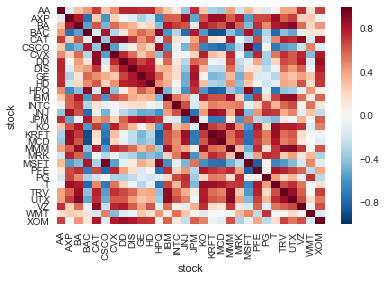

In [10]:
# 解答(4)
# ヒートマップ
sns.heatmap(corr_data)

In [11]:
# 解答(5)
# 相関係数が最大となるペアの抽出（自分自身以外の29ペアの中で）

# initial value
max_corr = 0
stock_1 = ""
stock_2 = ""

for i in range(0,len(corr_data)):
    print(corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].argmax()[1]
          ,corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].argmax()[0]
          ,corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0])
    if max_corr < corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]:
        max_corr = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]
        stock_1 = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].argmax()[1]
        stock_2 = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].argmax()[0]

# output max corr pairs
print("[Max Corr]:",max_corr)
print("[stock_1]:",stock_1)
print("[stock_2]:",stock_2)

AA DIS 0.772469765562
AXP KRFT 0.873510361155
BA UTX 0.916337961074
BAC HPQ 0.905816768001
CAT DD 0.902855810308
CSCO MSFT 0.953721664589
CVX CAT 0.889415656292
DD CAT 0.902855810308
DIS DD 0.826925813024
GE HD 0.858206931015
HD GE 0.858206931015
HPQ BAC 0.905816768001
IBM UTX 0.897552383536
INTC BA 0.691093956369
JNJ KRFT 0.861287988261
JPM GE 0.830450859436
KO T 0.868995241584
KRFT MCD 0.929921303792
MCD KRFT 0.929921303792
MMM UTX 0.913695562653
MRK JNJ 0.844027043885
MSFT CSCO 0.953721664589
PFE T 0.806543944675
PG MRK 0.749713136729
T KO 0.868995241584
TRV MMM 0.891726201616
UTX BA 0.916337961074
VZ CAT 0.890314789183
WMT PG 0.723705548508
XOM DD 0.86351075594
[Max Corr]: 0.953721664589
[stock_1]: CSCO
[stock_2]: MSFT


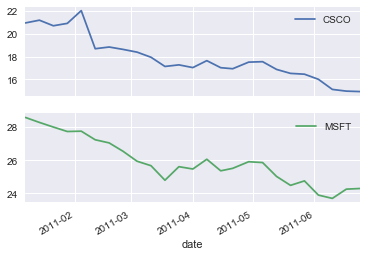

In [12]:
# 解答(5) グラフ化
# ペアトレーディングなどに使われる。
dow_close_data_subsets =dow_close_data[[stock_1,stock_2]]
dow_close_data_subsets.plot(subplots=True,grid=True)
plt.grid(True)

In [13]:
# 解答(6)
# 窓関数
dow_close_data.rolling(center=False,window=5).mean().head(10)

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-04,16.290,44.858,70.348,14.328,95.152,21.176,93.656,50.146,39.608,19.550,...,34.288,28.088,18.498,64.750,28.214,55.236,80.462,35.656,55.470,78.936
2011-02-11,16.480,45.336,70.900,14.432,97.114,20.722,94.708,51.110,40.400,20.130,...,33.432,27.818,18.596,64.796,28.138,56.368,81.686,35.748,55.792,80.382
2011-02-18,16.742,45.192,71.494,14.332,99.484,20.250,95.886,52.346,41.254,20.654,...,33.156,27.570,18.766,64.550,28.166,57.626,82.872,35.980,55.906,81.714
2011-02-25,16.920,44.698,71.618,14.322,101.334,19.834,97.550,53.490,41.896,20.870,...,32.814,27.276,18.866,63.936,28.126,58.546,83.506,36.184,55.110,82.986
2011-03-04,17.010,44.670,72.132,14.426,102.806,19.328,99.626,54.206,42.836,20.904,...,32.812,26.916,19.168,63.502,28.212,59.220,83.792,36.274,54.184,84.204


max volatility: CSCO
min volatility: KO


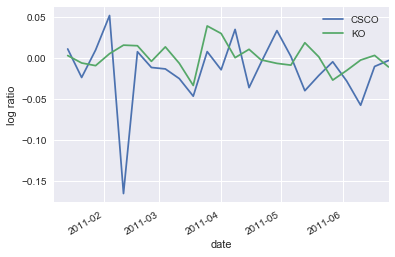

In [14]:
# 解答(7)
# 前週比（１期ずらし）をしたい場合、shiftを使う
# loopなどを使うより、断然処理が速い
log_ratio_stock_close = np.log(dow_close_data/dow_close_data.shift(1))

max_vol_stock = log_ratio_stock_close.std().argmax()
min_vol_stock = log_ratio_stock_close.std().argmin()

# 最大と最小の標準偏差のstock
print("max volatility:",max_vol_stock)
print("min volatility:",min_vol_stock)

#　グラフ化
log_ratio_stock_close[max_vol_stock].plot()
log_ratio_stock_close[min_vol_stock].plot()
plt.ylabel("log ratio")
plt.legend()
plt.grid(True)

### 4.4.2 マーケティング分析

次は、マーケティング分析でよく扱われる購買データです。一般ユーザーとは異なる法人の購買データですが、分析する軸は基本的に同じです。

（1）下記のURLよりデータをpandasで読み込んでください（件数50万以上のデータで比較的大きいため、少し時間がかかります。）

    "http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
    
    (ヒント)pd.ExcelFileを使って、シートを.parse('Online Retail')で指定してください。
    
    また、今回の分析対象は、CustomerIDにデータが入っているレコードのみ対象にするため、そのための処理をしてください。さらに、カラムのInvoiceNoには数字の前にCがあるものはキャンセルのため、このデータを取り除いてください。他にもデータとして取り除く必要なものがあれば、適宜処理してください。以下、このデータをベースに分析していきます。

（2）このデータのカラムには、購買日時や商品名、数量、回数、購買者のIDなどがあります。ここで、購買者（CustomerID）のユニーク数、バスケット数（InvoiceNoのユニーク数）、商品の種類（StockCodeベースとDescriptionベースのユニーク数）を求めてください。

（3）このデータのカラムには、Countryがあります。このカラムを軸に、それぞれの国の購買合計金額（単位あたりの金額×数量の合計）を求め、降順にならべて、上位5つの国の結果を表示してください。

（4）上の上位5つの国について、それぞれの国の商品売り上げ（合計金額）の月別の時系列推移をグラフにしてください。ここで、グラフは分けて表示してください。

（5）上の上位5つの国について、それぞれの国における商品の売り上げTOP5の商品を抽出してください。また、それらを国ごとに円グラフにしてください。なお、商品は「Description」ベースで集計してください。

In [1]:
cd /Users/kunitaka/chapter2/

/Users/kunitaka/chapter2


In [2]:
ls

dow_jones_index.data          online_retail_data_table.csv
dow_jones_index.names


In [167]:
# 解答 (1)
#　時間がかかります
file_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
online_retail_data = pd.ExcelFile(file_url)

# シートを指定する
online_retail_data_table = online_retail_data.parse('Online Retail')
online_retail_data_table.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [168]:
# データの確認
online_retail_data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [169]:
# 解答 (1)
# c はキャンセルとあるので、取り除く処理を書く
# InvoiceNoの1文字目を抽出する処理、mapとLambda関数を使う
online_retail_data_table['cancel_flg'] = online_retail_data_table.InvoiceNo.map(lambda x:str(x)[0])
online_retail_data_table.groupby("cancel_flg").size()

cancel_flg
5    532618
A         3
C      9288
dtype: int64

In [170]:
# 解答　(1)
# Aも? 異常値として処理して、削除する
#そのため、今回は5があるものだけ分析対象
# さらに、CustomerIDがあるデータだけ対象
online_retail_data_table = online_retail_data_table[(online_retail_data_table.cancel_flg == '5') & (online_retail_data_table.CustomerID.notnull())]

In [171]:
# 解答　(2)
# unique ID
print("購買者数（ユニーク）:",len(online_retail_data_table.CustomerID.unique()))

# unique StockCode
print("商品コード数:",len(online_retail_data_table.StockCode.unique()))

# unique description
# 上より多いから、同じstockcodeで違う名前になった商品がある。
print("商品名の種類数:",len(online_retail_data_table.Description.unique()))

# unique bascket
print("バスケット数:",len(online_retail_data_table.InvoiceNo.unique()))

購買者数（ユニーク）: 4339
商品コード数: 3665
商品名の種類数: 3877
バスケット数: 18536


In [172]:
# 解答 (3)
# 売り上げ合計を求めるため、新しいカラムの追加（売り上げ＝数量×単価）
online_retail_data_table['TotalPrice'] = online_retail_data_table.Quantity * online_retail_data_table.UnitPrice

#　それぞれの国ごとに売り上げ合計金額を算出
country_data_total_p = online_retail_data_table.groupby("Country")["TotalPrice"].sum()

# 値に対して、降順にソートして、TOP5を抜き出す。
top_five_country =country_data_total_p.sort_values(ascending=False)[0:5]

# TOP5の国
print(top_five_country)

# TOP5の国のリスト
print("TOP5の国のリスト:",top_five_country.index)

Country
United Kingdom    7.308392e+06
Netherlands       2.854463e+05
EIRE              2.655459e+05
Germany           2.288671e+05
France            2.090240e+05
Name: TotalPrice, dtype: float64
TOP5の国のリスト: Index(['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France'], dtype='object', name='Country')


In [173]:
# 解答 (4)
# TOP5だけのデータを作成。
top_five_country_data = online_retail_data_table[online_retail_data_table["Country"].isin(top_five_country.index)]

# date と国ごとの売り上げ
top_five_country_data_country_totalP =top_five_country_data.groupby(["InvoiceDate","Country"],as_index=False)["TotalPrice"].sum()

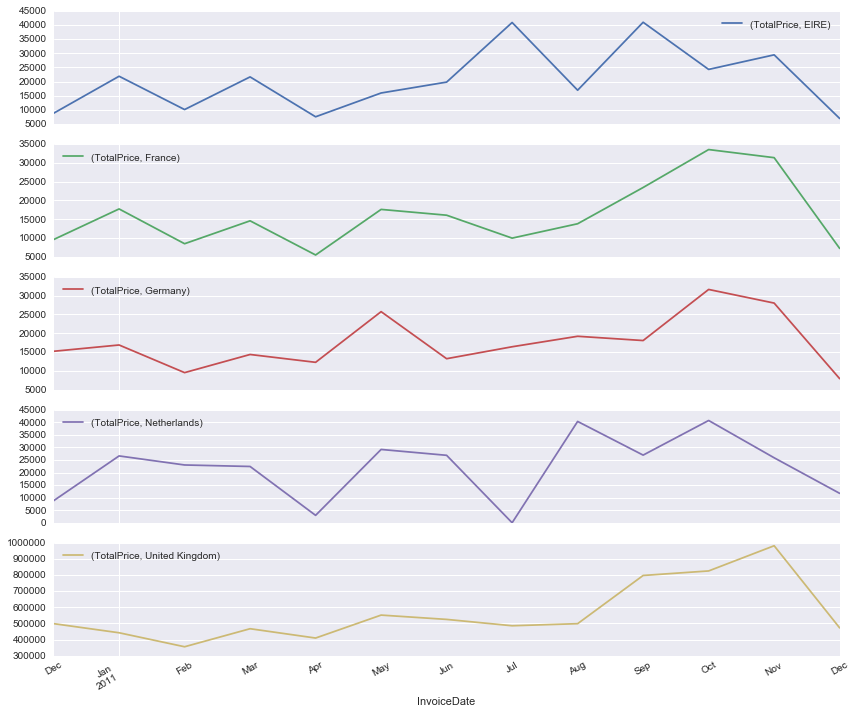

In [174]:
# 解答 (4)
# TOP 5の売り上げ月別推移

# indexの設定（日時と国）
top_five_country_data_country_totalP_index=top_five_country_data_country_totalP.set_index(['InvoiceDate','Country'])

# 再構成
top_five_country_data_country_totalP_index_uns = top_five_country_data_country_totalP_index.unstack()

# resampleで時系列のデータを月別や四半期等に変更できる。今回は、月別(M)の合計を算出。そのあと、グラフ化
top_five_country_data_country_totalP_index_uns.resample('M').sum().plot(subplots=True,figsize=(12,10))

# グラフが被らないように
plt.tight_layout()

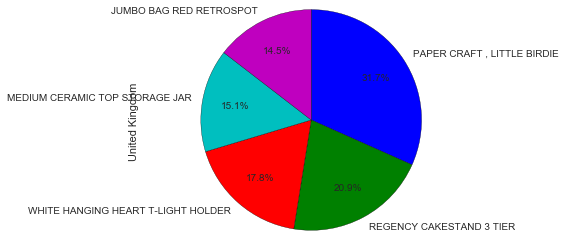

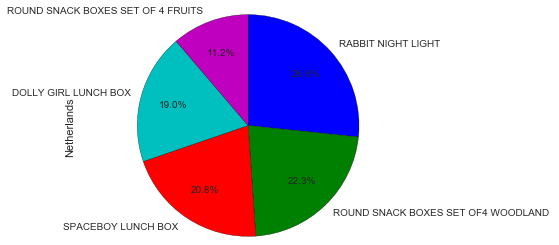

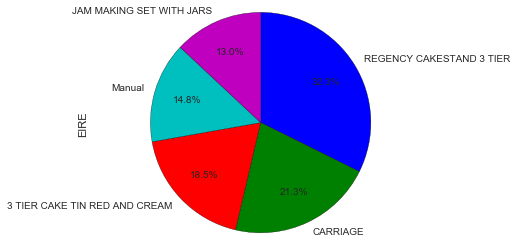

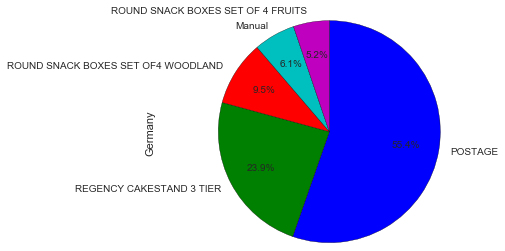

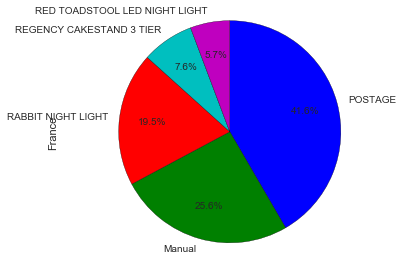

In [175]:
# 解答 (5)
for x in top_five_country.index:
    #print("Country:",x)
    country = online_retail_data_table[online_retail_data_table["Country"] == x]
    country_stock_data = country.groupby("Description")["TotalPrice"].sum()
    top_five_country_stock_data=pd.DataFrame(country_stock_data.sort_values(ascending=False)[0:5])    
    plt.figure()
    plt.pie(top_five_country_stock_data
            ,labels=top_five_country_stock_data.index
            ,counterclock=False
            ,startangle=90
            ,autopct="%.1f%%"
            ,pctdistance=0.7)
    plt.ylabel(x)
    plt.axis('equal')
    #print(top_five_country_stock_data)